# Подготовка и анализ данных

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", None)
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
import sys, os

data_folder = os.path.abspath('C:/Users/regbi/Downloads/course_project')
train_data_path = os.path.join(data_folder, 'course_project_train.csv')
test_data_path = os.path.join(data_folder, 'course_project_test.csv')

In [3]:
DTYPE = {
    'Home Ownership': np.object,
    'Annual Income': np.float64,
    'Years in current job': np.object,
    'Tax Liens': np.int64,
    'Number of Open Accounts': np.int64,
    'Years of Credit History': np.float64,
    'Maximum Open Credit': np.int64,
    'Number of Credit Problems': np.int64,
    'Months since last delinquent': np.float64,
    'Bankruptcies': np.float64,
    'Purpose': np.object,
    'Term': np.object,
    'Current Loan Amount': np.int64,
    'Current Credit Balance': np.int64,
    'Monthly Debt': np.int64,
    'Credit Score': np.float64,
    'Credit Default': np.int64,
}

In [4]:
df = pd.read_csv(train_data_path, dtype=DTYPE)
df_initial = df.copy(deep=True)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0


In [5]:
df_test = pd.read_csv(test_data_path, dtype=DTYPE)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0,9,12.5,220968,0,70.0,0.0,debt consolidation,Short Term,162470,105906,6813,NaN
1,Rent,231838.0,1 year,0,6,32.7,55946,0,8.0,0.0,educational expenses,Short Term,78298,46037,2318,699.0
2,Home Mortgage,1152540.0,3 years,0,10,13.7,204600,0,NaN,0.0,debt consolidation,Short Term,200178,146490,18729,7260.0
3,Home Mortgage,1220313.0,10+ years,0,16,17.0,456302,0,70.0,0.0,debt consolidation,Short Term,217382,213199,27559,739.0
4,Home Mortgage,2340952.0,6 years,0,11,23.6,1207272,0,NaN,0.0,debt consolidation,Long Term,777634,425391,42605,706.0


In [138]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)
CORRECTED_FEATURE_NAMES = []

In [136]:
def df_c():
    return df.drop(CORRECTED_FEATURE_NAMES, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   int64  
 4   Number of Open Accounts       7500 non-null   int64  
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   int64  
 7   Number of Credit Problems     7500 non-null   int64  
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   int64  
 13  Cur

In [8]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [9]:
df_test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


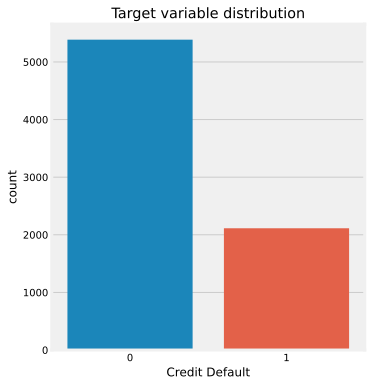

In [10]:
plt.figure(figsize=(5, 6))

sns.countplot(x=TARGET_NAME, data=df)

plt.title('Target variable distribution')
plt.show()

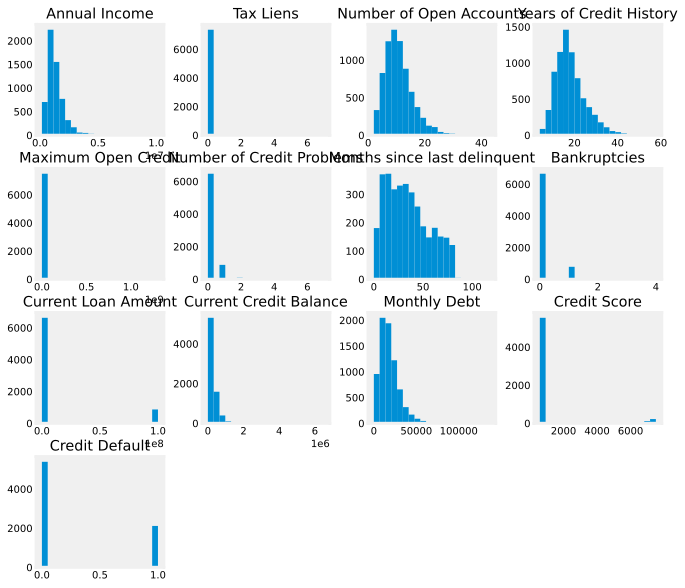

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df.select_dtypes(include=numerics).hist(figsize=(10, 10), bins=20, grid=False)
plt.show()

In [12]:
def plot_corr(df, col=[]):
    
    plt.figure(figsize = (7,7))

    sns.set(font_scale=0.8)

    
    if len(col):
        corr_matrix = df[col].corr()
    else:
        corr_matrix = df.corr()
    
    corr_matrix = np.round(corr_matrix, 2)
    corr_matrix[np.abs(corr_matrix) < 0.05] = 0

    sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

    plt.title('Correlation matrix')
    plt.show()

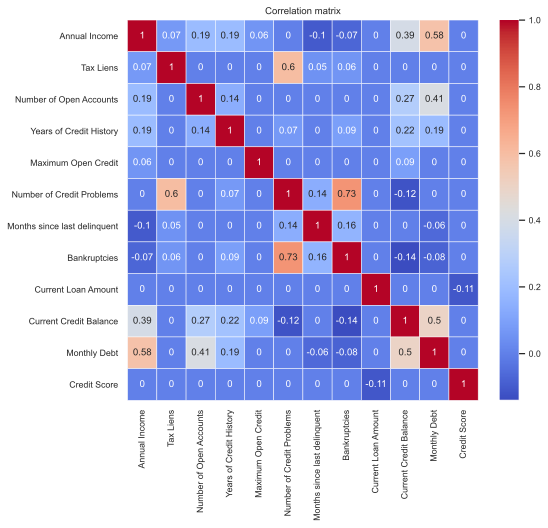

In [13]:
plot_corr(df, BASE_FEATURE_NAMES)

In [167]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [168]:
df['Tax Liens'].value_counts()

0    7366
1      83
2      30
3      10
4       6
6       2
5       2
7       1
Name: Tax Liens, dtype: int64

In [170]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [171]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

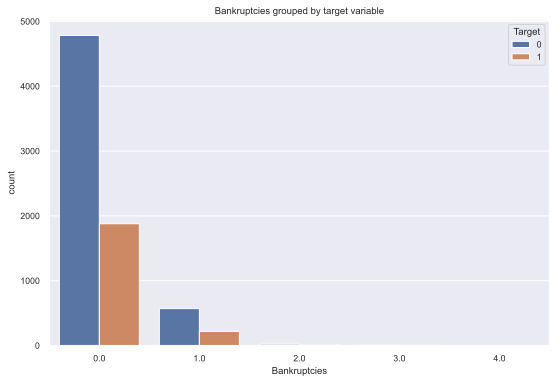

In [14]:
plt.figure(figsize=(8, 6))

sns.countplot(x="Bankruptcies", hue=TARGET_NAME, data=df)
plt.title('Bankruptcies grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

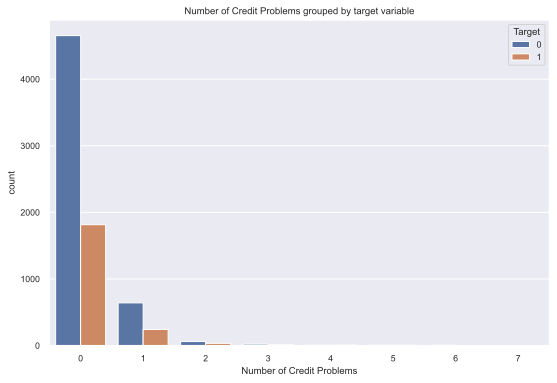

In [15]:
plt.figure(figsize=(8, 6))

sns.countplot(x="Number of Credit Problems", hue=TARGET_NAME, data=df)
plt.title('Number of Credit Problems grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

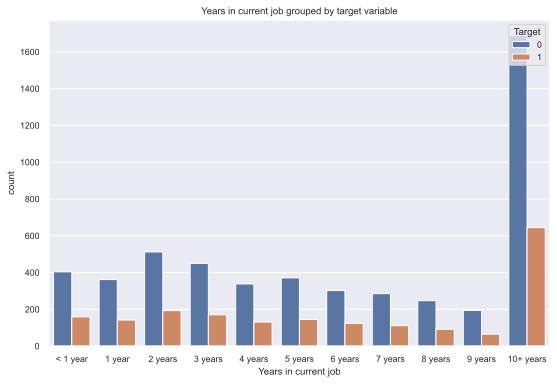

In [16]:
plt.figure(figsize=(8, 6))

sns.countplot(
    x='Years in current job', 
    hue=TARGET_NAME, 
    data=df,
    order=[
        '< 1 year',
        '1 year',
        '2 years',
        '3 years',
        '4 years',
        '5 years',
        '6 years',
        '7 years',
        '8 years',
        '9 years',
        '10+ years',
    ]
)

plt.title('Years in current job grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [17]:
vals = df["Years in current job"].drop_duplicates().to_list()
vals

[nan,
 '10+ years',
 '8 years',
 '6 years',
 '7 years',
 '5 years',
 '1 year',
 '< 1 year',
 '4 years',
 '3 years',
 '2 years',
 '9 years']

In [18]:
df["Years in current job"].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [19]:
vals_dict = {
    np.nan: -1,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}
vals_dict

{nan: -1,
 '< 1 year': 0,
 '1 year': 1,
 '2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
 '10+ years': 10}

In [20]:
mapped_years_in_current_job = pd.DataFrame(df['Years in current job'].apply(lambda x: vals_dict[x]))
mapped_years_in_current_job

,Years in current job
0,-1
1,10
2,8
3,6
4,8
...,...
7495,0
7496,1
7497,6
7498,-1


In [21]:
mapped_years_in_current_job[TARGET_NAME] = df[TARGET_NAME]
mapped_years_in_current_job

,Years in current job,Credit Default
0,-1,0
1,10,1
2,8,0
3,6,0
4,8,0
...,...,...
7495,0,0
7496,1,1
7497,6,0
7498,-1,0


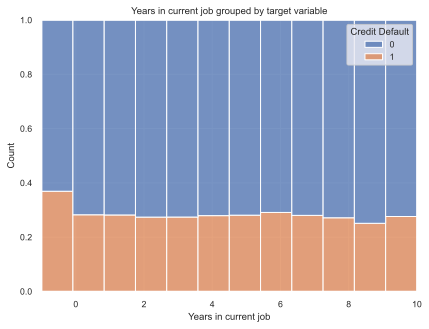

In [22]:
plt.figure(figsize=(6, 5))

sns.histplot(
    x="Years in current job", 
    hue=TARGET_NAME, 
    data=mapped_years_in_current_job, 
    multiple='fill',
    bins=12,
)
plt.title('Years in current job grouped by target variable')

plt.show()

In [23]:
df['Years in current job Corrected'] = mapped_years_in_current_job['Years in current job']
df

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0,-1
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1,10
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0,8
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0,6
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0,3,8.5,107866,0,NaN,0.0,other,Short Term,129360,73492,1900,697.0,0,0
7496,Home Mortgage,1533984.0,1 year,0,10,26.5,686312,0,43.0,0.0,debt consolidation,Long Term,444048,456399,12783,7410.0,1,1
7497,Rent,1878910.0,6 years,0,12,32.1,1778920,0,NaN,0.0,buy a car,Short Term,99999999,477812,12479,748.0,0,6
7498,Home Mortgage,NaN,NaN,0,21,26.5,1141250,0,NaN,0.0,debt consolidation,Short Term,615274,476064,37118,NaN,0,-1


In [139]:
CORRECTED_FEATURE_NAMES.append('Years in current job')

## Итог

Необходимо:
* проверить выбросы в **"Maximum Open Credit"**, **"Credit Score"** и **"Current Loan Amount"**
* заполнить пропуски для **"Annual Income"**, **"Years in current job"**, **"Months since last delinquent"**, **"Bankruptcies"** и **"Credit Score"**

# Проверка выбросов

In [24]:
def plot_dist(df, feature):
    plt.figure(figsize=(10,6))
    sns.distplot(df[feature])
    plt.show()

In [25]:
def plot_by_threshold(df, feature, threshold, scope='left'):
    condition = df[feature] <= threshold
    print(f'({df[condition][feature].count()} + {df[-condition][feature].count()}) = {df[feature].count()}')
    plt.figure(figsize=(10,6))
    if scope == 'left':
        sns.distplot(df[condition][feature])
    elif scope == 'right':
        sns.distplot(df[-condition][feature])
    plt.show()

## Maximum Open Credit

(7481 + 19) = 7500


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


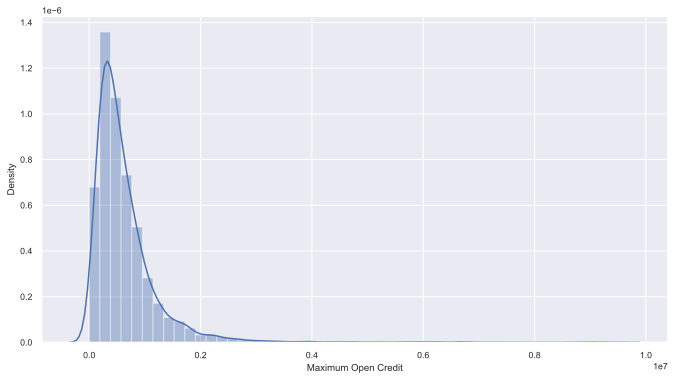

In [26]:
plot_by_threshold(df, 'Maximum Open Credit', 10000000, 'left')

(7481 + 19) = 7500


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


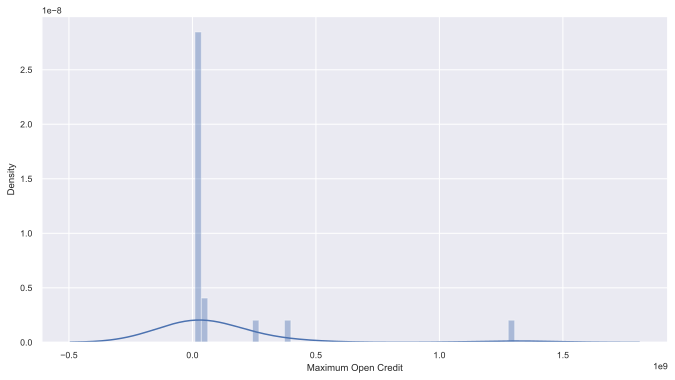

In [27]:
plot_by_threshold(df, 'Maximum Open Credit', 10000000, 'right')

### Вывод

Считаем, что выбросы являются реальнми данными без ошибок.

## Credit Score

(5543 + 400) = 5943


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


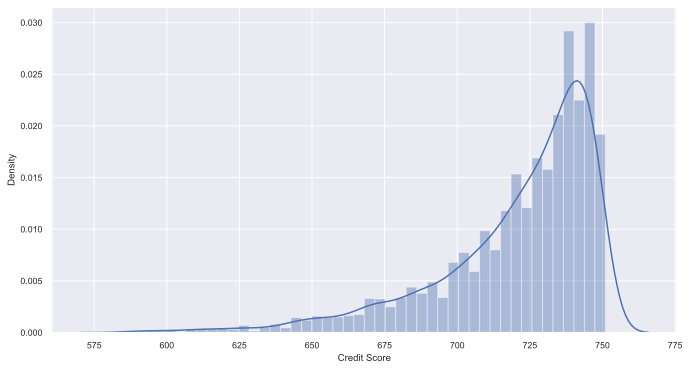

In [28]:
plot_by_threshold(df, 'Credit Score', 1000, 'left')

(5543 + 400) = 5943


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


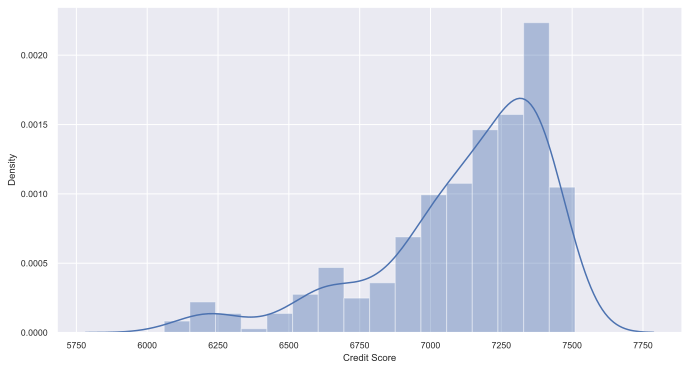

In [29]:
plot_by_threshold(df, 'Credit Score', 1000, 'right')

In [30]:
check_df = df[df['Credit Score'] >= 1000]['Credit Score'] % 10
check_df

69      0.0
87      0.0
94      0.0
96      0.0
116     0.0
       ... 
7422    0.0
7433    0.0
7450    0.0
7460    0.0
7496    0.0
Name: Credit Score, Length: 400, dtype: float64

In [31]:
check_df.value_counts()

0.0    400
Name: Credit Score, dtype: int64

**Наблюдение**

В данных присутствует ошибка, на это указывают два признака:
* данные после отсечки в 1000 ведут себя также, как и до неё (одинаковое распределение)
* все скоры делятся на 10 без остатка, что косвенно указывает на ошибку при выгрузке или подобное

**Гипотеза** 

* Нулевая гипотеза: данные после отсечки в 1000 относятся к остальной выборке, но являются искаженными в десять раз (помножены на 10)
* Альтернативная гипотеза: данные после отсечки в 1000 являются верными
* Критерий: критерий Стьюдента
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо сравнить средние значения выборки до отсечки и выборки после отсечки со значением делённым на 10.
Если вероятность того, что мат. ожидания в исходных группах равны при данных выборках, будет менее 5%, то можно будет говорить о том, что данные не были искажены.

In [32]:
from scipy.stats import ttest_ind

In [33]:
credit_score = df[['Credit Score']]
credit_score['Divider'] = [10 if x > 1000 else 1 for x in df['Credit Score']]
credit_score['Credit Score Corrected'] = df['Credit Score'] / credit_score['Divider']
credit_score

<ipython-input-33-c7d5cd278c16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_score['Divider'] = [10 if x > 1000 else 1 for x in df['Credit Score']]
<ipython-input-33-c7d5cd278c16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_score['Credit Score Corrected'] = df['Credit Score'] / credit_score['Divider']


,Credit Score,Divider,Credit Score Corrected
0,749.0,1,749.0
1,737.0,1,737.0
2,742.0,1,742.0
3,694.0,1,694.0
4,719.0,1,719.0
...,...,...,...
7495,697.0,1,697.0
7496,7410.0,10,741.0
7497,748.0,1,748.0
7498,NaN,1,NaN


In [34]:
def plot_kde(s1, s2, xlabel, name):
    plt.figure(figsize=(10, 5))

    sns.kdeplot(s1, shade=True, label='1', color='g')
    sns.kdeplot(s2, shade=True, label='10', color='r')

    plt.xlabel(xlabel)
    plt.title(name)
    plt.show()

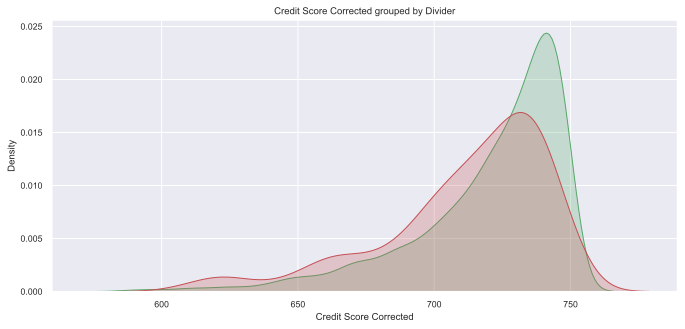

In [35]:
credit_score_with_divider_s = credit_score[credit_score['Credit Score Corrected'].notna()][['Credit Score Corrected', 'Divider']]
credit_score_s = credit_score_with_divider_s['Credit Score Corrected']
credit_score_divider_1 = credit_score_s[credit_score_with_divider_s['Divider'] == 1]
credit_score_divider_10 = credit_score_s[credit_score_with_divider_s['Divider'] == 10]

plot_kde(
    credit_score_divider_1,
    credit_score_divider_10,
    'Credit Score Corrected',
    'Credit Score Corrected grouped by Divider'
)

In [36]:
ttest_ind(
    a=credit_score_s[credit_score_with_divider_s['Divider'] == 1],
    b=credit_score_s[credit_score_with_divider_s['Divider'] == 10],
)

Ttest_indResult(statistic=6.374481913067594, pvalue=1.973940372449366e-10)

### Вывод

$p-value > \alpha$, значит можно считать верной нулевую гипотезу. Добавим новый признак в выборку.

In [37]:
df['Credit Score Corrected'] = credit_score['Credit Score Corrected']
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0,-1,749.0
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1,10,737.0
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0,8,742.0
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0,6,694.0
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0,8,719.0


In [140]:
CORRECTED_FEATURE_NAMES.append('Credit Score')

## Current Loan Amount

(6630 + 870) = 7500


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


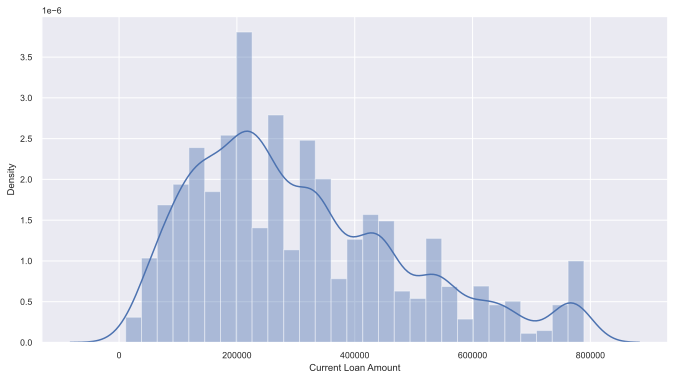

In [39]:
plot_by_threshold(df, 'Current Loan Amount', 10000000, 'left')

(6630 + 870) = 7500


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


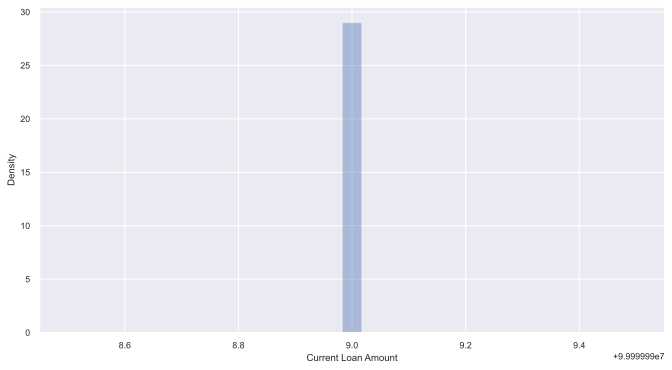

In [40]:
plot_by_threshold(df, 'Current Loan Amount', 10000000, 'right')

In [41]:
df[df['Current Loan Amount'] > 10000000]['Current Loan Amount'].value_counts()

99999999    870
Name: Current Loan Amount, dtype: int64

In [42]:
current_loan_amount_good_data = df[df['Current Loan Amount'] <= 10000000]

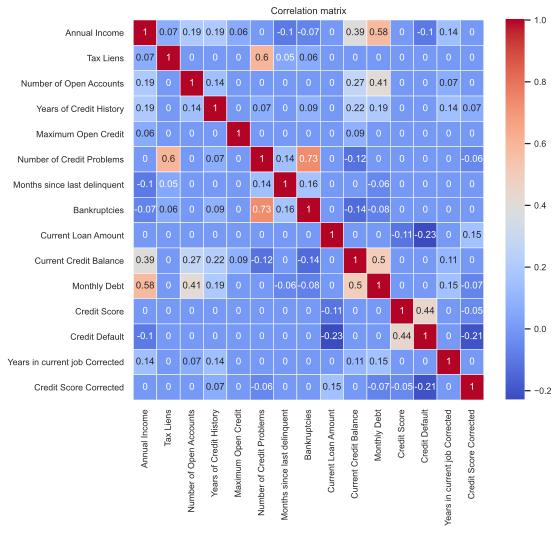

In [43]:
plot_corr(df)

In [44]:
corr = abs(current_loan_amount_good_data.corr()[['Current Loan Amount']]).sort_values(
    by='Current Loan Amount', 
    ascending=False
)
corr.head()

,Current Loan Amount
Current Loan Amount,1.000000
Annual Income,0.457887
Monthly Debt,0.438284
Current Credit Balance,0.368589
Credit Score Corrected,0.216333


In [45]:
current_loan_amount_good_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected
count,5.073000e+03,6630.000000,6630.000000,6630.000000,6.630000e+03,6630.000000,3048.000000,6619.000000,6630.000000,6.630000e+03,6630.000000,5073.000000,6630.000000,6630.000000,5073.000000
mean,1.355864e+06,0.030920,11.130468,18.292323,9.592976e+05,0.171493,34.687992,0.117843,309024.390347,2.881239e+05,18364.505430,1223.263749,0.318703,5.540422,718.348315
std,8.352678e+05,0.273168,4.923003,7.044410,1.702849e+07,0.502822,21.752647,0.348568,182294.008621,3.120490e+05,11881.789299,1726.313043,0.466009,3.834537,28.576091
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000,-1.000000,585.000000
25%,8.396100e+05,0.000000,8.000000,13.500000,2.765070e+05,0.000000,16.000000,0.000000,172744.000000,1.141852e+05,10151.750000,709.000000,0.000000,2.000000,706.000000
50%,1.162572e+06,0.000000,10.000000,17.000000,4.735500e+05,0.000000,32.000000,0.000000,265826.000000,2.091045e+05,16206.500000,730.000000,0.000000,5.000000,727.000000
75%,1.627597e+06,0.000000,14.000000,21.800000,7.848060e+05,0.000000,50.000000,0.000000,430100.000000,3.590192e+05,23881.500000,743.000000,1.000000,10.000000,740.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,789030.000000,6.506797e+06,136679.000000,7510.000000,1.000000,10.000000,751.000000


Чтобы исправить значения в **"Current Loan Amount"**, сначало нужно устраниь пробелы в **"Annual Income"**

# Заполнение пропусков

## Annual Income

C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


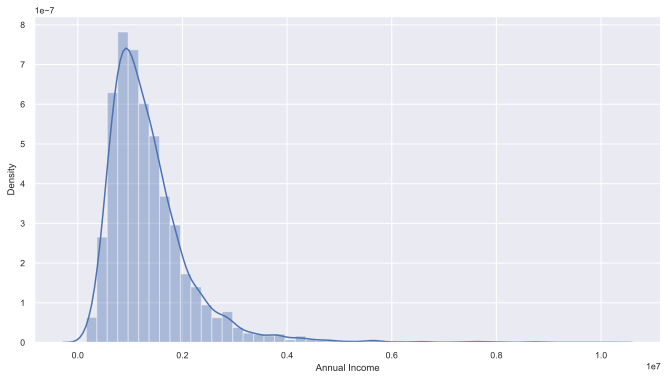

In [46]:
plot_dist(df, 'Annual Income')

In [47]:
corr = abs(df.corr()[['Annual Income']]).sort_values(
    by='Annual Income', 
    ascending=False
)
corr.head()

,Annual Income
Annual Income,1.000000
Monthly Debt,0.584819
Current Credit Balance,0.386481
Number of Open Accounts,0.188524
Years of Credit History,0.186531


In [48]:
high_corr_columns = corr.head().index.tolist()
high_corr_columns.remove('Annual Income')
high_corr_columns

['Monthly Debt',
 'Current Credit Balance',
 'Number of Open Accounts',
 'Years of Credit History']

In [49]:
df[high_corr_columns].describe()

,Monthly Debt,Current Credit Balance,Number of Open Accounts,Years of Credit History
count,7500.000000,7.500000e+03,7500.000000,7500.000000
mean,18314.454133,2.898332e+05,11.130933,18.317467
std,11926.764673,3.178714e+05,4.908924,7.041946
min,0.000000,0.000000e+00,2.000000,4.000000
25%,10067.500000,1.142565e+05,8.000000,13.500000
50%,16076.500000,2.093230e+05,10.000000,17.000000
75%,23818.000000,3.604062e+05,14.000000,21.800000
max,136679.000000,6.506797e+06,43.000000,57.700000


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [75]:
def lin_reg_fillna(df, feature, train_columns):
    
    scaler = StandardScaler()
    
    train = df[df[feature].notna()][train_columns]
    train_answers = df[df[feature].notna()][feature]
    
    train_s = pd.DataFrame(
        scaler.fit_transform(train), 
        columns=train_columns, 
        index=train.index
    )
    
    predict = df[df[feature].isna()][train_columns]
    
    predict_s = pd.DataFrame(
        scaler.transform(predict), 
        columns=train_columns, 
        index=predict.index
    )
    
    lr = LinearRegression()
    lr.fit(train_s, train_answers)
    
    predict_answers = lr.predict(predict_s)
    
    predict[feature] = predict_answers
    train[feature] = train_answers
    
    corrected = train[[feature]].append(predict[[feature]], verify_integrity=True)
    
    return predict, corrected

In [76]:
predict, corrected = lin_reg_fillna(df, 'Annual Income', high_corr_columns)

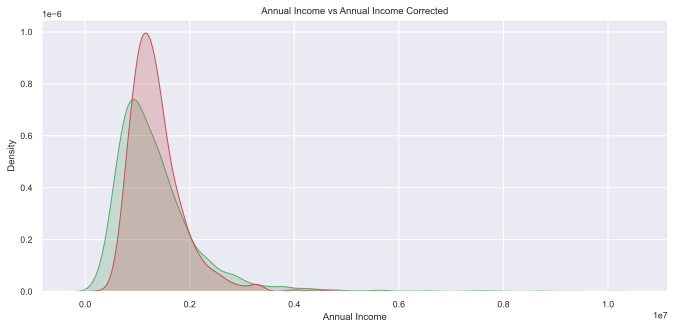

In [77]:
plot_kde(
    df['Annual Income'],
    predict['Annual Income'],
    'Annual Income',
    'Annual Income vs Annual Income Corrected'
)

**Наблюдение**

Заполненные с помощью регрессии пропуски подчиняются схожему закону распределения, что и исходные данные.

**Гипотеза** 

* Нулевая гипотеза: исправленные данные можно отнести к основной выборке (схожее распределение, удовлетворительное качество восстановления)
* Альтернативная гипотеза: исправленные данные нельзя отнести к основной выборке
* Критерий: критерий Стьюдента
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо сравнить средние значения выборки без пропусков и выборки с восстановленными значениями.
Если вероятность того, что мат. ожидания в исходных группах равны при данных выборках, будет менее 5%, то можно будет говорить о том, что данные восстановленные данные недостаточно точны.

In [78]:
ttest_ind(
    a=df[df['Annual Income'].notna()]['Annual Income'],
    b=predict['Annual Income'],
)

Ttest_indResult(statistic=-0.21989358452277966, pvalue=0.8259600189966037)

### Вывод

$p-value > \alpha$, значит можно считать верной нулевую гипотезу. Добавим новый признак в выборку.

In [79]:
df['Annual Income Corrected'] = corrected['Annual Income']
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000,7500.000000,5943.000000,7.500000e+03
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733,5.540000,720.086993,1.367418e+06
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874,3.831826,27.957233,7.893805e+05
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,-1.000000,585.000000,1.645970e+05
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000,2.000000,708.000000,8.793200e+05
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000,6.000000,729.000000,1.207174e+06
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000,10.000000,740.000000,1.626521e+06
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,10.000000,751.000000,1.014934e+07


In [141]:
CORRECTED_FEATURE_NAMES.append('Annual Income')

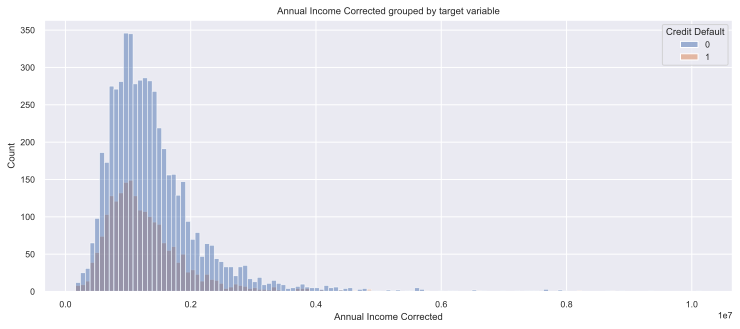

In [147]:
plt.figure(figsize=(11, 5))

sns.histplot(
    x="Annual Income Corrected", 
    hue=TARGET_NAME, 
    data=df, 
    multiple='layer'
)
plt.title('Annual Income Corrected grouped by target variable')

plt.show()

## Current Loan Amount (Part 2)

Переведём 99999999 в **NaN**

In [81]:
df['Current Loan Amount Corrected'] = df['Current Loan Amount'].apply(lambda x: np.nan if x == 99999999 else x)
df['Current Loan Amount Corrected']

0            NaN
1       264968.0
2            NaN
3       121396.0
4       125840.0
          ...   
7495    129360.0
7496    444048.0
7497         NaN
7498    615274.0
7499     26928.0
Name: Current Loan Amount Corrected, Length: 7500, dtype: float64

In [82]:
corr = abs(df.drop(['Current Loan Amount', 'Annual Income'], axis=1).corr()[['Current Loan Amount Corrected']]).sort_values(
    by='Current Loan Amount Corrected', 
    ascending=False
)
corr.head(10)

,Current Loan Amount Corrected
Current Loan Amount Corrected,1.000000
Annual Income Corrected,0.448982
Monthly Debt,0.438284
Current Credit Balance,0.368589
Credit Score Corrected,0.216333
Number of Open Accounts,0.214093
Years in current job Corrected,0.160956
Years of Credit History,0.151634
Bankruptcies,0.096855
Credit Default,0.066139


In [83]:
high_corr_columns = corr.head(8).index.tolist()
high_corr_columns.remove('Current Loan Amount Corrected')
df[high_corr_columns].describe()

,Annual Income Corrected,Monthly Debt,Current Credit Balance,Credit Score Corrected,Number of Open Accounts,Years in current job Corrected,Years of Credit History
count,7.500000e+03,7500.000000,7.500000e+03,5943.000000,7500.000000,7500.000000,7500.000000
mean,1.367418e+06,18314.454133,2.898332e+05,720.086993,11.130933,5.540000,18.317467
std,7.893805e+05,11926.764673,3.178714e+05,27.957233,4.908924,3.831826,7.041946
min,1.645970e+05,0.000000,0.000000e+00,585.000000,2.000000,-1.000000,4.000000
25%,8.793200e+05,10067.500000,1.142565e+05,708.000000,8.000000,2.000000,13.500000
50%,1.207174e+06,16076.500000,2.093230e+05,729.000000,10.000000,6.000000,17.000000
75%,1.626521e+06,23818.000000,3.604062e+05,740.000000,14.000000,10.000000,21.800000
max,1.014934e+07,136679.000000,6.506797e+06,751.000000,43.000000,10.000000,57.700000


In [84]:
high_corr_columns.remove('Credit Score Corrected')

In [85]:
predict, corrected = lin_reg_fillna(df, 'Current Loan Amount Corrected', high_corr_columns)

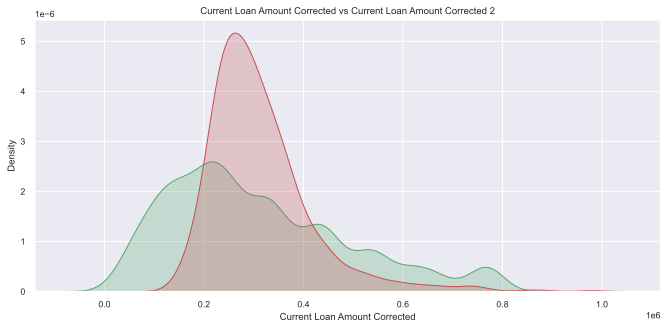

In [86]:
plot_kde(
    df['Current Loan Amount Corrected'],
    predict['Current Loan Amount Corrected'],
    'Current Loan Amount Corrected',
    'Current Loan Amount Corrected vs Current Loan Amount Corrected 2'
)

**Наблюдение**

Заполненные с помощью регрессии пропуски подчиняются схожему закону распределения, что и исходные данные.

**Гипотеза** 

* Нулевая гипотеза: исправленные данные можно отнести к основной выборке (схожее распределение, удовлетворительное качество восстановления)
* Альтернативная гипотеза: исправленные данные нельзя отнести к основной выборке
* Критерий: критерий Стьюдента
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо сравнить средние значения выборки без пропусков и выборки с восстановленными значениями.
Если вероятность того, что мат. ожидания в исходных группах равны при данных выборках, будет менее 5%, то можно будет говорить о том, что данные восстановленные данные недостаточно точны.

In [87]:
ttest_ind(
    a=df[df['Current Loan Amount Corrected'].notna()]['Current Loan Amount Corrected'],
    b=predict['Current Loan Amount Corrected'],
)

Ttest_indResult(statistic=-0.707780967478424, pvalue=0.47910328664559054)

### Вывод

$p-value > \alpha$, значит можно считать верной нулевую гипотезу. Добавим новый признак в выборку.

In [90]:
df['Current Loan Amount Corrected'] = corrected
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Current Loan Amount Corrected 2
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0,-1,749.0,482087.0,187366.973746,187366.973746
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1,10,737.0,1025487.0,264968.000000,264968.000000
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0,8,742.0,751412.0,278333.796634,278333.796634
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0,6,694.0,805068.0,121396.000000,121396.000000
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0,8,719.0,776264.0,125840.000000,125840.000000


In [148]:
CORRECTED_FEATURE_NAMES.append('Current Loan Amount')

## Months since last delinquent

C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


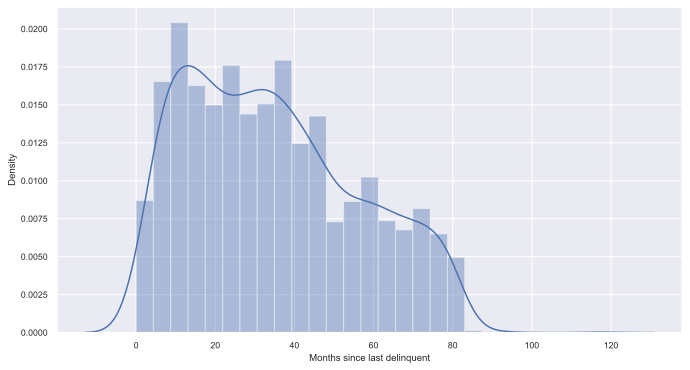

In [91]:
plot_dist(df, 'Months since last delinquent')

In [92]:
corr = abs(df.corr()[['Months since last delinquent']]).sort_values(
    by='Months since last delinquent', 
    ascending=False
)
corr.head(10)

,Months since last delinquent
Months since last delinquent,1.000000
Bankruptcies,0.162710
Number of Credit Problems,0.139905
Annual Income,0.101787
Annual Income Corrected,0.091092
Monthly Debt,0.057702
Tax Liens,0.052446
Current Loan Amount Corrected,0.035760
Current Loan Amount Corrected 2,0.035760
Number of Open Accounts,0.032740


Нет достаточно сильной корреляции с численными показателями, чтобы можно было заполнить пропуски с помощью линейной регрессии. Рассмотрим в разрезе категориальных признаков.

In [93]:
check_df = df[['Months since last delinquent', TARGET_NAME]]
check_df['col_filled'] = [1 if not np.isnan(x) else 0 for x in check_df['Months since last delinquent']]
check_df.head()

<ipython-input-93-7469e6002ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_df['col_filled'] = [1 if not np.isnan(x) else 0 for x in check_df['Months since last delinquent']]


,Months since last delinquent,Credit Default,col_filled
0,NaN,0,0
1,NaN,1,0
2,NaN,0,0
3,NaN,0,0
4,NaN,0,0


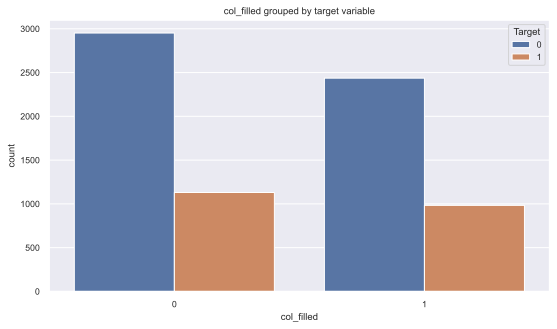

In [150]:
plt.figure(figsize=(8, 5))

sns.countplot(x="col_filled", hue=TARGET_NAME, data=check_df)
plt.title('col_filled grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [95]:
def plot_box(df, feature_x, feature_y, orient='h'):
    plt.figure(figsize=(9,3))

    sns.boxplot(
        x=df[feature_x], 
        y=df[feature_y],
        orient=orient
    )

    plt.xlabel(feature_x)
    plt.ylabel(feature_y)

    plt.show()

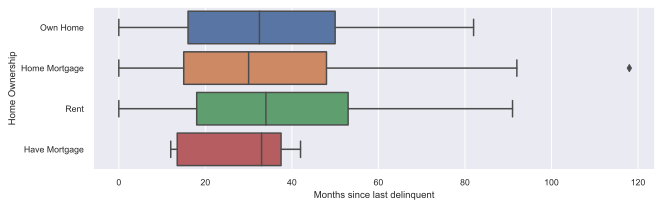

In [96]:
plot_box(df, 'Months since last delinquent', 'Home Ownership')

In [97]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

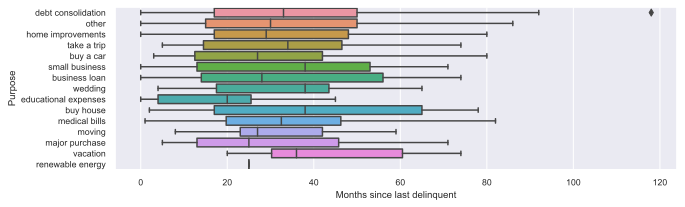

In [98]:
plot_box(df, 'Months since last delinquent', 'Purpose')

In [99]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

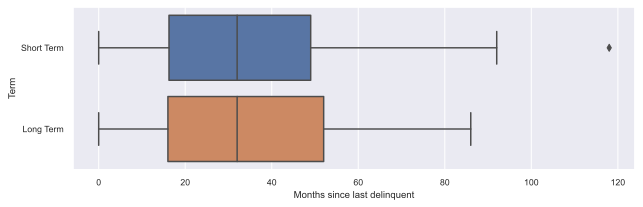

In [100]:
plot_box(df, 'Months since last delinquent', 'Term')

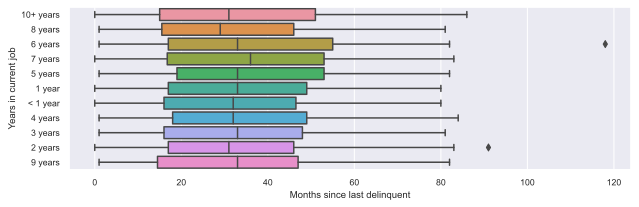

In [101]:
plot_box(df, 'Months since last delinquent', 'Years in current job')

In [102]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

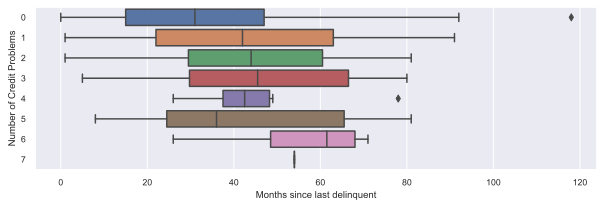

In [104]:
plot_box(df, 'Months since last delinquent', 'Number of Credit Problems')

In [105]:
df[df['Months since last delinquent'].isna()]['Number of Credit Problems'].value_counts()

0    3557
1     468
2      38
3      15
4       3
Name: Number of Credit Problems, dtype: int64

In [106]:
df[['Months since last delinquent', 'Purpose']]

,Months since last delinquent,Purpose
0,NaN,debt consolidation
1,NaN,debt consolidation
2,NaN,debt consolidation
3,NaN,debt consolidation
4,NaN,debt consolidation
...,...,...
7495,NaN,other
7496,43.0,debt consolidation
7497,NaN,buy a car
7498,NaN,debt consolidation


In [107]:
def mode_by_feature(df, to_get_mode, by_this_feature):
    
    feature_vals = df[by_this_feature].drop_duplicates().to_list()
    
    modes = dict()
    for v in feature_vals:
        modes[v] = df[df[by_this_feature] == v][to_get_mode].mode()[0]
        
    mapped_modes = df[df[to_get_mode].isna()][by_this_feature].map(modes)
    
    res = df[[to_get_mode]]
    res.loc[df[to_get_mode].isna(), to_get_mode] = mapped_modes
    
    return res

In [108]:
df['Months since last delinquent Corrected'] = mode_by_feature(df, 'Months since last delinquent', 'Purpose')['Months since last delinquent']
df.head()

C:\Users\regbi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-107-cf2474eb02c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.loc[df[to_get_mode].isna(), to_get_mode] = mapped_modes


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Current Loan Amount Corrected 2,Months since last delinquent Corrected
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0,-1,749.0,482087.0,187366.973746,187366.973746,14.0
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1,10,737.0,1025487.0,264968.000000,264968.000000,14.0
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0,8,742.0,751412.0,278333.796634,278333.796634,14.0
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0,6,694.0,805068.0,121396.000000,121396.000000,14.0
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0,8,719.0,776264.0,125840.000000,125840.000000,14.0


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


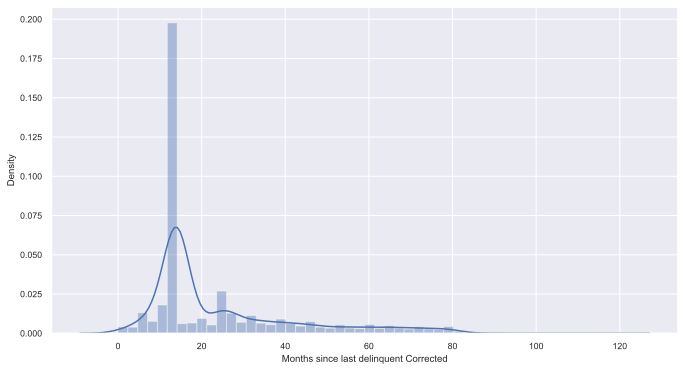

In [109]:
plot_dist(df, 'Months since last delinquent Corrected')

**Наблюдение**

Заполненные с помощью регрессии пропуски сильно выделяются на фоне остальных. Но для избежания ошибки второго рода, произведём проверку гипотезы.

**Гипотеза** 

* Нулевая гипотеза: исправленные данные можно отнести к основной выборке (схожее распределение, удовлетворительное качество восстановления)
* Альтернативная гипотеза: исправленные данные нельзя отнести к основной выборке
* Критерий: критерий Стьюдента
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо сравнить средние значения выборки без пропусков и выборки с восстановленными значениями.
Если вероятность того, что мат. ожидания в исходных группах равны при данных выборках, будет менее 5%, то можно будет говорить о том, что данные восстановленные данные недостаточно точны.

In [111]:
ttest_ind(
    a=df[df['Months since last delinquent'].notna()]['Months since last delinquent'],
    b=df[df['Months since last delinquent'].isna()]['Months since last delinquent Corrected'],
)

Ttest_indResult(statistic=54.618069285890016, pvalue=0.0)

### Вывод

$p-value < \alpha$, значит нужно отвергнуть нулевую гипотезу. Признак в выборку не добавляем.

In [122]:
df.drop('Months since last delinquent Corrected', axis=1, inplace=True)

Попробуем восстановить значения в рамках категории **Years in current job Corrected**

In [123]:
df['Months since last delinquent Corrected'] = mode_by_feature(
    df, 
    'Months since last delinquent', 
    'Years in current job Corrected'
)['Months since last delinquent']
df.head()

C:\Users\regbi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-107-cf2474eb02c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.loc[df[to_get_mode].isna(), to_get_mode] = mapped_modes


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0,-1,749.0,482087.0,187366.973746,8.0
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1,10,737.0,1025487.0,264968.000000,7.0
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0,8,742.0,751412.0,278333.796634,30.0
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0,6,694.0,805068.0,121396.000000,17.0
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0,8,719.0,776264.0,125840.000000,30.0


In [124]:
mode_by_feature(
    df, 
    'Months since last delinquent', 
    'Years in current job Corrected'
)

C:\Users\regbi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-107-cf2474eb02c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.loc[df[to_get_mode].isna(), to_get_mode] = mapped_modes


,Months since last delinquent
0,8.0
1,7.0
2,30.0
3,17.0
4,30.0
...,...
7495,33.0
7496,43.0
7497,17.0
7498,8.0


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


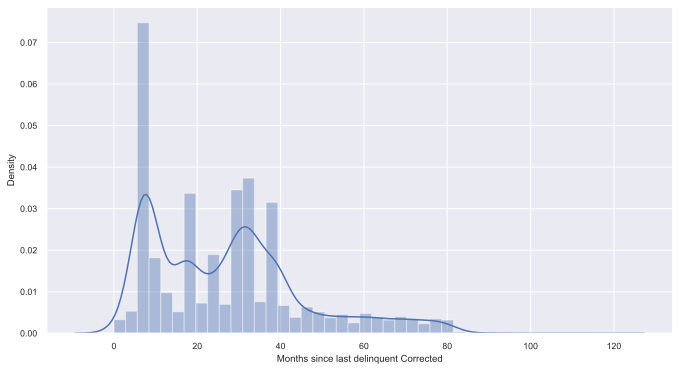

In [125]:
plot_dist(df, 'Months since last delinquent Corrected')

**Наблюдение**

Заполненные с помощью регрессии пропуски подчиняются схожему закону распределения, что и исходные данные.

**Гипотеза** 

* Нулевая гипотеза: исправленные данные можно отнести к основной выборке (схожее распределение, удовлетворительное качество восстановления)
* Альтернативная гипотеза: исправленные данные нельзя отнести к основной выборке
* Критерий: критерий Стьюдента
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо сравнить средние значения выборки без пропусков и выборки с восстановленными значениями.
Если вероятность того, что мат. ожидания в исходных группах равны при данных выборках, будет менее 5%, то можно будет говорить о том, что данные восстановленные данные недостаточно точны.

In [126]:
ttest_ind(
    a=df[df['Months since last delinquent'].notna()]['Months since last delinquent'],
    b=df[df['Months since last delinquent'].isna()]['Months since last delinquent Corrected'],
)

Ttest_indResult(statistic=35.26371610576565, pvalue=3.521371425017367e-252)

### Вывод

$p-value > \alpha$, значит можно считать верной нулевую гипотезу. Добавим новый признак в выборку.

In [151]:
CORRECTED_FEATURE_NAMES.append('Months since last delinquent')

## Bankruptcies

In [127]:
df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [128]:
df[df['Bankruptcies'].isna()]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected
100,Own Home,337079.0,1 year,0,9,39.6,644204,0,0.0,NaN,educational expenses,Short Term,99999999,224770,4326,734.0,0,1,734.0,3.370790e+05,195297.477374,0.0
256,Rent,857660.0,1 year,0,6,19.7,291082,0,0.0,NaN,debt consolidation,Short Term,99999999,236816,3488,743.0,0,1,743.0,8.576600e+05,212237.838631,0.0
257,Home Mortgage,NaN,2 years,0,15,13.6,1556390,0,0.0,NaN,debt consolidation,Short Term,447480,524210,19613,NaN,0,2,NaN,1.398682e+06,447480.000000,0.0
898,Rent,739005.0,2 years,0,20,18.3,2177758,0,0.0,NaN,debt consolidation,Short Term,456808,607487,9669,732.0,1,2,732.0,7.390050e+05,456808.000000,0.0
1404,Rent,349391.0,< 1 year,0,4,12.7,0,0,0.0,NaN,other,Short Term,11242,0,1243,747.0,0,0,747.0,3.493910e+05,11242.000000,0.0
3063,Rent,464474.0,10+ years,0,5,14.9,38126,0,0.0,NaN,other,Short Term,44814,18373,929,7490.0,1,10,749.0,4.644740e+05,44814.000000,0.0
3252,Rent,832770.0,< 1 year,0,7,16.5,636856,0,0.0,NaN,business loan,Short Term,156970,52250,1145,750.0,0,0,750.0,8.327700e+05,156970.000000,0.0
3351,Home Mortgage,2226192.0,8 years,0,14,23.3,792836,0,73.0,NaN,debt consolidation,Short Term,528968,625157,23746,674.0,0,8,674.0,2.226192e+06,528968.000000,73.0
3401,Rent,326154.0,6 years,0,2,19.1,0,0,77.0,NaN,other,Short Term,99999999,0,1245,712.0,0,6,712.0,3.261540e+05,164697.741287,77.0
3496,Rent,233567.0,1 year,0,7,11.7,0,0,0.0,NaN,educational expenses,Short Term,210166,0,0,746.0,0,1,746.0,2.335670e+05,210166.000000,0.0


Пропусков немного, заполним модой.

In [129]:
bankruptcies_corrected = df[['Bankruptcies']]
bankruptcies_corrected.loc[
    bankruptcies_corrected['Bankruptcies'].isna(), 
    'Bankruptcies'
] = bankruptcies_corrected[bankruptcies_corrected['Bankruptcies'].notna()]['Bankruptcies'].mode()[0]

C:\Users\regbi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-129-0b6107abb992>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankruptcies_corrected.loc[


In [130]:
df['Bankruptcies Corrected'] = bankruptcies_corrected
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0,-1,749.0,482087.0,187366.973746,8.0,1.0
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1,10,737.0,1025487.0,264968.000000,7.0,0.0
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0,8,742.0,751412.0,278333.796634,30.0,0.0
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0,6,694.0,805068.0,121396.000000,17.0,1.0
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0,8,719.0,776264.0,125840.000000,30.0,0.0


In [152]:
CORRECTED_FEATURE_NAMES.append('Bankruptcies')

## Credit Score Corrected

C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


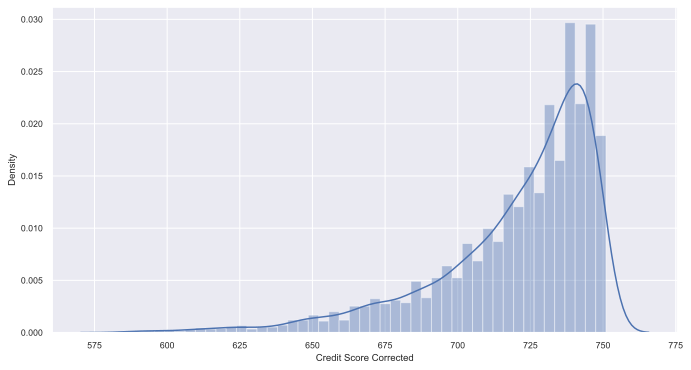

In [132]:
plot_dist(df, 'Credit Score Corrected')

In [133]:
df['Credit Score Corrected'].describe()

count    5943.000000
mean      720.086993
std        27.957233
min       585.000000
25%       708.000000
50%       729.000000
75%       740.000000
max       751.000000
Name: Credit Score Corrected, dtype: float64

In [156]:
corr = abs(df_c().corr()[['Credit Score Corrected']]).sort_values(
    by='Credit Score Corrected', 
    ascending=False
)
corr.head(10)

,Credit Score Corrected
Credit Score Corrected,1.000000
Credit Default,0.207155
Current Loan Amount Corrected,0.197674
Monthly Debt,0.070542
Years of Credit History,0.068364
Number of Credit Problems,0.055090
Months since last delinquent Corrected,0.045007
Bankruptcies Corrected,0.041420
Number of Open Accounts,0.034756
Annual Income Corrected,0.028571


In [159]:
high_corr_columns = corr.head(10).index.tolist()
high_corr_columns.remove('Credit Score Corrected')
df[high_corr_columns].describe()

,Credit Default,Current Loan Amount Corrected,Monthly Debt,Years of Credit History,Number of Credit Problems,Months since last delinquent Corrected,Bankruptcies Corrected,Number of Open Accounts,Annual Income Corrected
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03
mean,0.281733,309542.365681,18314.454133,18.317467,0.170000,27.081600,0.116933,11.130933,1.367418e+06
std,0.449874,174953.855382,11926.764673,7.041946,0.498598,18.471518,0.346904,4.908924,7.893805e+05
min,0.000000,11242.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,1.645970e+05
25%,0.000000,179437.500000,10067.500000,13.500000,0.000000,10.000000,0.000000,8.000000,8.793200e+05
50%,0.000000,269258.000000,16076.500000,17.000000,0.000000,26.000000,0.000000,10.000000,1.207174e+06
75%,1.000000,411697.000000,23818.000000,21.800000,0.000000,38.000000,0.000000,14.000000,1.626521e+06
max,1.000000,980548.864386,136679.000000,57.700000,7.000000,118.000000,4.000000,43.000000,1.014934e+07


In [160]:
predict, corrected = lin_reg_fillna(df, 'Credit Score Corrected', high_corr_columns)

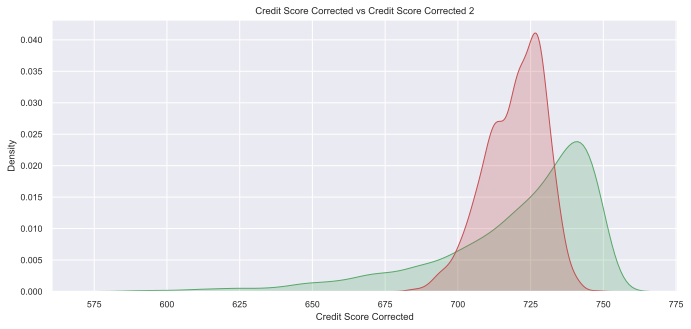

In [161]:
plot_kde(
    df['Credit Score Corrected'],
    predict['Credit Score Corrected'],
    'Credit Score Corrected',
    'Credit Score Corrected vs Credit Score Corrected 2'
)

**Наблюдение**

Заполненные с помощью регрессии пропуски подчиняются схожему закону распределения, что и исходные данные.

**Гипотеза** 

* Нулевая гипотеза: исправленные данные можно отнести к основной выборке (схожее распределение, удовлетворительное качество восстановления)
* Альтернативная гипотеза: исправленные данные нельзя отнести к основной выборке
* Критерий: критерий Стьюдента
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо сравнить средние значения выборки без пропусков и выборки с восстановленными значениями.
Если вероятность того, что мат. ожидания в исходных группах равны при данных выборках, будет менее 5%, то можно будет говорить о том, что данные восстановленные данные недостаточно точны.

In [162]:
ttest_ind(
    a=df[df['Credit Score Corrected'].notna()]['Credit Score Corrected'],
    b=predict['Credit Score Corrected'],
)

Ttest_indResult(statistic=0.468082267146283, pvalue=0.6397393652439685)

### Вывод

$p-value > \alpha$, значит можно считать верной нулевую гипотезу. Добавим новый признак в выборку.

In [165]:
df['Credit Score Corrected'] = corrected

In [166]:
df_c().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Home Ownership                          7500 non-null   object 
 1   Tax Liens                               7500 non-null   int64  
 2   Number of Open Accounts                 7500 non-null   int64  
 3   Years of Credit History                 7500 non-null   float64
 4   Maximum Open Credit                     7500 non-null   int64  
 5   Number of Credit Problems               7500 non-null   int64  
 6   Purpose                                 7500 non-null   object 
 7   Term                                    7500 non-null   object 
 8   Current Credit Balance                  7500 non-null   int64  
 9   Monthly Debt                            7500 non-null   int64  
 10  Credit Default                          7500 non-null   int6

## Итог

Все пропуски и выбросы обработаны, можно переходить к формированию новых признаков.

# Формирование новых признаков

## Home Ownership

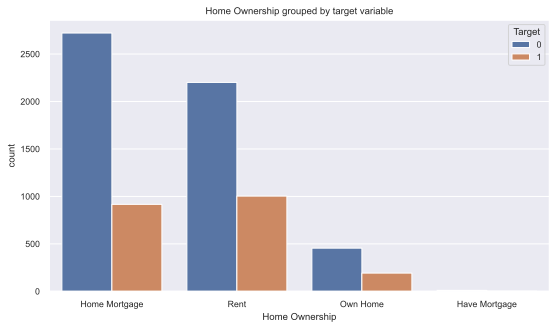

In [174]:
plt.figure(figsize=(8, 5))

sns.countplot(
    x="Home Ownership", 
    hue=TARGET_NAME, 
    data=df, 
    order=['Home Mortgage', 'Rent', 'Own Home', 'Have Mortgage']
)
plt.title('Home Ownership grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [247]:
def count_ratio(df, group_1, group_2):
    cnt = pd.DataFrame(df[[group_1, group_2]].groupby([group_1, group_2]).size()).reset_index()
    cnt.rename(columns={0:'cnt'}, inplace=True)
    
    grp_cnt = pd.DataFrame(df[[group_1]].groupby([group_1]).size()).reset_index()
    grp_cnt.rename(columns={0:'grp_cnt'}, inplace=True)
    
    mrg = cnt.merge(grp_cnt, on=group_1, how='inner')
    
    mrg['ratio'] = mrg['cnt'] / mrg['grp_cnt']
    
    return mrg

In [248]:
count_ratio(df, 'Home Ownership', TARGET_NAME)

,Home Ownership,Credit Default,cnt,grp_cnt,ratio
0,Have Mortgage,0,10,12,0.833333
1,Have Mortgage,1,2,12,0.166667
2,Home Mortgage,0,2721,3637,0.748144
3,Home Mortgage,1,916,3637,0.251856
4,Own Home,0,455,647,0.703246
5,Own Home,1,192,647,0.296754
6,Rent,0,2201,3204,0.686954
7,Rent,1,1003,3204,0.313046


**Наблюдение**

По данным видно, что категории **"Own Home"** и **"Rent"** имею схожую долю дефолтов.

**Гипотеза** 

* Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы
* Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
* Критерий: Хи-квадрат Пирсона
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо подать наблюдаемые частоты категорий **"Own Home"** и **"Rent"** признака Home **Ownership** в выбранный критерий, после чего оценить значение достигаемого уровня значимости p-value и сравнить с его с выбранным порогом альфа, если p-value получится больше выбранного порога, то гипотезу о согласованности частот можно не отбрасывать.

In [220]:
from scipy.stats import chi2_contingency

In [269]:
def check_category_merge(df, feature, values_to_merge, target_feature):
    data = df.reset_index()
    data = data.loc[
        data[feature].isin(values_to_merge), 
        ['index', feature, target_feature]
    ]
    
    table = data.pivot_table(
        values='index', 
        index=feature, 
        columns=target_feature, 
        aggfunc='count'
    )
    
    chi2, p, dof, expected = chi2_contingency(table, correction=False)
    
    return table, p

In [270]:
table, p = check_category_merge(df, 'Home Ownership', ['Own Home', 'Rent'], TARGET_NAME)
table

Credit Default,0,1
Home Ownership,,
Own Home,455,192
Rent,2201,1003


In [271]:
p

0.41388761719718237

$p-value > \alpha$, значит можно считать верной нулевую гипотезу. Объединим категории **"Own Home"** и **"Rent"** в категорию **"Own Home / Rent"** и выведем это в новый признак.

In [239]:
df['Home Ownership Corrected'] = df['Home Ownership'].apply(
    lambda x: 'Own Home / Rent' if x in ['Own Home', 'Rent'] else x
)
df['Home Ownership Corrected'].value_counts()

Own Home / Rent    3851
Home Mortgage      3637
Have Mortgage        12
Name: Home Ownership Corrected, dtype: int64

In [240]:
CORRECTED_FEATURE_NAMES.append('Home Ownership')

In [328]:
pd.get_dummies(data=df['Home Ownership Corrected'], prefix='Home Ownership Corrected').head()

,Home Ownership Corrected_Have Mortgage,Home Ownership Corrected_Home Mortgage,Home Ownership Corrected_Own Home / Rent
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [329]:
df = pd.concat([df, pd.get_dummies(data=df['Home Ownership Corrected'], prefix='Home Ownership Corrected')], axis=1)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected,Home Ownership Corrected,Home Ownership Corrected_Have Mortgage,Home Ownership Corrected_Home Mortgage,Home Ownership Corrected_Own Home / Rent
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0,-1,749.0,482087.0,187366.973746,8.0,1.0,Own Home / Rent,0,0,1
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1,10,737.0,1025487.0,264968.000000,7.0,0.0,Own Home / Rent,0,0,1
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0,8,742.0,751412.0,278333.796634,30.0,0.0,Home Mortgage,0,1,0
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0,6,694.0,805068.0,121396.000000,17.0,1.0,Own Home / Rent,0,0,1
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0,8,719.0,776264.0,125840.000000,30.0,0.0,Own Home / Rent,0,0,1


In [416]:
df[['Home Ownership Corrected', 'Years in current job Corrected']].value_counts()

Home Ownership Corrected  Years in current job Corrected
Home Mortgage              10                               1425
Own Home / Rent            10                                903
                           2                                 453
                           0                                 385
                           3                                 369
                           1                                 329
                           4                                 273
                           5                                 261
Home Mortgage              5                                 254
                           2                                 251
                           3                                 250
                           6                                 221
Own Home / Rent           -1                                 205
                           6                                 204
                           7     

## Purpose

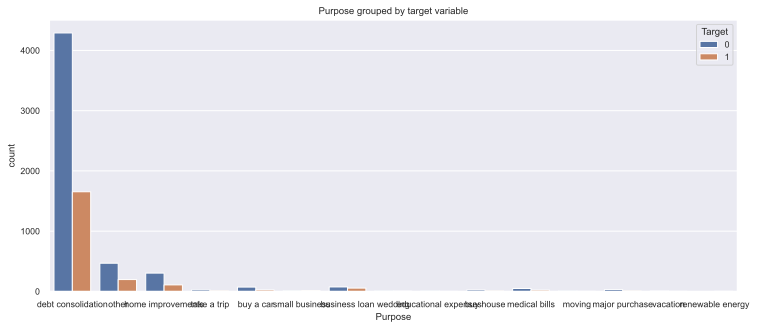

In [251]:
plt.figure(figsize=(11, 5))

sns.countplot(
    x="Purpose",
    hue=TARGET_NAME,
    data=df,
)
plt.title('Purpose grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [417]:
count = count_ratio(df, 'Purpose', TARGET_NAME)
ratios = count[count['Credit Default'] == 1].sort_values(by='ratio', ascending=False)
ratios

,Purpose,Credit Default,cnt,grp_cnt,ratio
20,renewable energy,1,2,2,1.000000
22,small business,1,14,26,0.538462
1,business loan,1,55,129,0.426357
15,medical bills,1,22,71,0.309859
19,other,1,197,665,0.296241
7,debt consolidation,1,1654,5944,0.278264
24,take a trip,1,10,37,0.270270
28,wedding,1,4,15,0.266667
5,buy house,1,9,34,0.264706
11,home improvements,1,108,412,0.262136


In [305]:
col_list = ratios['Purpose'].to_list()
col_list

['educational expenses',
 'moving',
 'major purchase',
 'buy a car',
 'vacation',
 'home improvements',
 'buy house',
 'wedding',
 'take a trip',
 'debt consolidation',
 'other',
 'medical bills',
 'business loan',
 'small business']

In [307]:
table, p = check_category_merge(
    df, 
    'Purpose', 
    col_list, 
    TARGET_NAME)
p

0.011192078858376692

In [309]:
table, p = check_category_merge(
    df, 
    'Purpose', 
    ['buy a car', 'debt consolidation'], 
    TARGET_NAME)
p

0.5396666095625493

In [419]:
count[count['Credit Default'] == 1].sort_values(by='cnt', ascending=False)

,Purpose,Credit Default,cnt,grp_cnt,ratio
7,debt consolidation,1,1654,5944,0.278264
19,other,1,197,665,0.296241
11,home improvements,1,108,412,0.262136
1,business loan,1,55,129,0.426357
3,buy a car,1,24,96,0.250000
15,medical bills,1,22,71,0.309859
22,small business,1,14,26,0.538462
24,take a trip,1,10,37,0.270270
5,buy house,1,9,34,0.264706
13,major purchase,1,9,40,0.225000


In [324]:
table, p = check_category_merge(
    df, 
    'Purpose', 
    ['other', 'home improvements'],
    TARGET_NAME)
p

0.2273086253629389

## Term

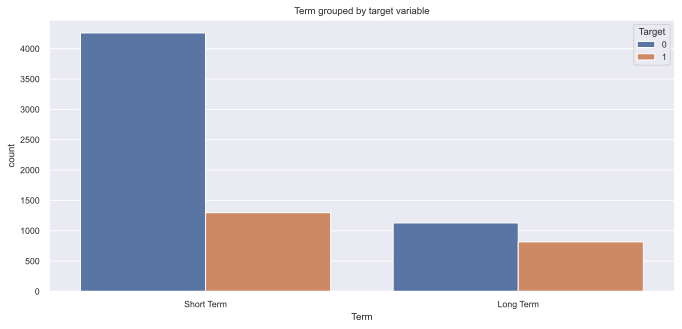

In [326]:
plt.figure(figsize=(10, 5))

sns.countplot(
    x="Term",
    hue=TARGET_NAME,
    data=df,
)
plt.title('Term grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [330]:
df = pd.concat([df, pd.get_dummies(data=df['Term'], prefix='Term')], axis=1)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected,Home Ownership Corrected,Home Ownership Corrected_Have Mortgage,Home Ownership Corrected_Home Mortgage,Home Ownership Corrected_Own Home / Rent,Term_Long Term,Term_Short Term
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0,-1,749.0,482087.0,187366.973746,8.0,1.0,Own Home / Rent,0,0,1,0,1
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1,10,737.0,1025487.0,264968.000000,7.0,0.0,Own Home / Rent,0,0,1,1,0
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0,8,742.0,751412.0,278333.796634,30.0,0.0,Home Mortgage,0,1,0,0,1
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0,6,694.0,805068.0,121396.000000,17.0,1.0,Own Home / Rent,0,0,1,0,1
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0,8,719.0,776264.0,125840.000000,30.0,0.0,Own Home / Rent,0,0,1,0,1


In [332]:
df_c().head()

,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Purpose,Term,Current Credit Balance,Monthly Debt,Credit Default,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected,Home Ownership Corrected,Home Ownership Corrected_Have Mortgage,Home Ownership Corrected_Home Mortgage,Home Ownership Corrected_Own Home / Rent,Term_Long Term,Term_Short Term
0,0,11,26.3,685960,1,debt consolidation,Short Term,47386,7914,0,-1,749.0,482087.0,187366.973746,8.0,1.0,Own Home / Rent,0,0,1,0,1
1,0,15,15.3,1181730,0,debt consolidation,Long Term,394972,18373,1,10,737.0,1025487.0,264968.000000,7.0,0.0,Own Home / Rent,0,0,1,1,0
2,0,11,35.0,1182434,0,debt consolidation,Short Term,308389,13651,0,8,742.0,751412.0,278333.796634,30.0,0.0,Home Mortgage,0,1,0,0,1
3,0,8,22.5,147400,1,debt consolidation,Short Term,95855,11338,0,6,694.0,805068.0,121396.000000,17.0,1.0,Own Home / Rent,0,0,1,0,1
4,0,13,13.6,385836,1,debt consolidation,Short Term,93309,7180,0,8,719.0,776264.0,125840.000000,30.0,0.0,Own Home / Rent,0,0,1,0,1


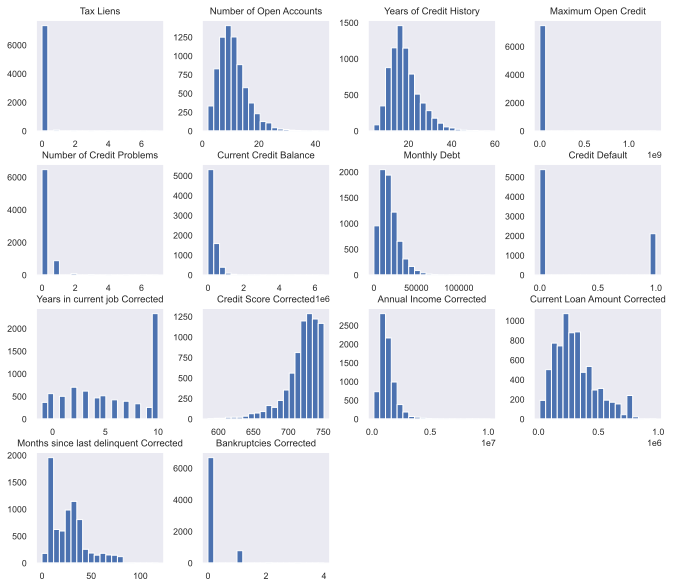

In [343]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_c().select_dtypes(include=numerics).hist(figsize=(10, 10), bins=20, grid=False)
plt.show()

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [345]:
feature_num_names = df_c().drop(columns=TARGET_NAME).select_dtypes(include=numerics).columns.tolist()
feature_num_names

['Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Monthly Debt',
 'Years in current job Corrected',
 'Credit Score Corrected',
 'Annual Income Corrected',
 'Current Loan Amount Corrected',
 'Months since last delinquent Corrected',
 'Bankruptcies Corrected']

In [421]:
df[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [441]:
x = pd.concat(
    [
        df_c()[feature_num_names].sample(2113, random_state = 32), 
        df_c().select_dtypes('uint8').sample(2113, random_state = 32)
    ], axis=1
).sort_index()
y = df_c()[TARGET_NAME].sample(2113, random_state = 32).sort_index()

In [442]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size=0.2, 
    shuffle=True, 
    random_state=32
)

In [443]:
x_train

,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Current Credit Balance,Monthly Debt,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected,Home Ownership Corrected_Have Mortgage,Home Ownership Corrected_Home Mortgage,Home Ownership Corrected_Own Home / Rent,Term_Long Term,Term_Short Term
560,0,9,11.1,439736,0,232047,23415,1,720.0,1025487.0,263868.0,12.0,0.0,0,0,1,1,0
5593,0,9,16.7,945626,0,539828,12129,2,733.0,1102608.0,540980.0,29.0,0.0,0,1,0,0,1
5594,0,9,14.8,884136,0,552824,28786,7,706.0,1919038.0,755062.0,10.0,0.0,0,1,0,1,0
7019,0,15,29.9,6183782,0,961305,18979,7,732.0,1674603.0,193908.0,74.0,0.0,0,1,0,0,1
6784,0,10,14.5,535612,0,337212,11283,0,705.0,658217.0,332068.0,33.0,0.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,0,22,20.8,1321056,0,676552,55220,1,723.0,2548603.0,607552.0,18.0,0.0,0,0,1,0,1
1772,0,11,26.5,2001472,0,618830,20235,10,720.0,1587070.0,302676.0,61.0,0.0,0,1,0,1,0
889,0,4,14.7,205018,0,97204,13368,8,747.0,778696.0,135256.0,30.0,0.0,0,0,1,0,1
4666,0,6,16.3,222002,1,146091,8758,1,730.0,498294.0,53262.0,18.0,1.0,0,1,0,0,1


In [444]:
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(
    scaler.fit_transform(x_train[feature_num_names]), 
    columns=feature_num_names, 
    index=x_train.index
)

x_train_scaled.head()

,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Current Credit Balance,Monthly Debt,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected
560,-0.115163,-0.441940,-1.033024,-0.224389,-0.335633,-0.188539,0.393095,-1.193031,-0.013697,-0.465674,-0.288420,-0.806217,-0.341531
5593,-0.115163,-0.441940,-0.215116,0.196962,-0.335633,0.679116,-0.531443,-0.931354,0.504234,-0.368736,1.265461,0.096879,-0.341531
5594,-0.115163,-0.441940,-0.492620,0.145748,-0.335633,0.715752,0.833081,0.377032,-0.571470,0.657483,2.465907,-0.912464,-0.341531
7019,-0.115163,0.764973,1.712811,4.559770,-0.335633,1.867288,0.029702,0.377032,0.464393,0.350238,-0.680715,2.487429,-0.341531
6784,-0.115163,-0.240787,-0.536437,-0.144535,-0.335633,0.107928,-0.600746,-1.454708,-0.611311,-0.927317,0.094005,0.309373,-0.341531


In [445]:
x_test_scaled = pd.DataFrame(
    scaler.transform(x_test[feature_num_names]), 
    columns=feature_num_names, 
    index=x_test.index
)

x_test_scaled.head()

,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Current Credit Balance,Monthly Debt,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected
3663,-0.115163,2.173038,-0.740914,0.098784,-0.335633,0.428980,0.494265,1.162063,-0.372265,-0.211877,0.272639,-1.071834,-0.341531
2985,-0.115163,-1.246548,-0.813941,-0.351683,-0.335633,-0.274132,-0.778756,-1.454708,0.278252,-0.467864,-0.921273,0.309373,-0.341531
1152,-0.115163,1.167278,1.084774,-0.318828,-0.335633,-0.195877,-0.557084,1.162063,0.663598,-1.021222,-1.010341,-1.071834,-0.341531
7136,-0.115163,2.776495,-0.463409,0.030474,-0.335633,0.293896,1.060407,-0.931354,-2.722878,-0.350418,-1.177868,0.096879,-0.341531
2879,-0.115163,-1.447700,0.150022,-0.372736,-0.335633,-0.602576,-1.310329,-1.193031,1.181530,-1.470279,-1.339597,-0.487477,-0.341531


In [446]:
x_train_scaled = pd.concat([x_train_scaled, x_train.select_dtypes('uint8')], axis=1)
x_train_scaled.head()

,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Current Credit Balance,Monthly Debt,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected,Home Ownership Corrected_Have Mortgage,Home Ownership Corrected_Home Mortgage,Home Ownership Corrected_Own Home / Rent,Term_Long Term,Term_Short Term
560,-0.115163,-0.441940,-1.033024,-0.224389,-0.335633,-0.188539,0.393095,-1.193031,-0.013697,-0.465674,-0.288420,-0.806217,-0.341531,0,0,1,1,0
5593,-0.115163,-0.441940,-0.215116,0.196962,-0.335633,0.679116,-0.531443,-0.931354,0.504234,-0.368736,1.265461,0.096879,-0.341531,0,1,0,0,1
5594,-0.115163,-0.441940,-0.492620,0.145748,-0.335633,0.715752,0.833081,0.377032,-0.571470,0.657483,2.465907,-0.912464,-0.341531,0,1,0,1,0
7019,-0.115163,0.764973,1.712811,4.559770,-0.335633,1.867288,0.029702,0.377032,0.464393,0.350238,-0.680715,2.487429,-0.341531,0,1,0,0,1
6784,-0.115163,-0.240787,-0.536437,-0.144535,-0.335633,0.107928,-0.600746,-1.454708,-0.611311,-0.927317,0.094005,0.309373,-0.341531,0,0,1,1,0


In [447]:
x_test_scaled = pd.concat([x_test_scaled, x_test.select_dtypes('uint8')], axis=1)
x_test_scaled.head()

,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Current Credit Balance,Monthly Debt,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected,Home Ownership Corrected_Have Mortgage,Home Ownership Corrected_Home Mortgage,Home Ownership Corrected_Own Home / Rent,Term_Long Term,Term_Short Term
3663,-0.115163,2.173038,-0.740914,0.098784,-0.335633,0.428980,0.494265,1.162063,-0.372265,-0.211877,0.272639,-1.071834,-0.341531,0,1,0,1,0
2985,-0.115163,-1.246548,-0.813941,-0.351683,-0.335633,-0.274132,-0.778756,-1.454708,0.278252,-0.467864,-0.921273,0.309373,-0.341531,0,0,1,0,1
1152,-0.115163,1.167278,1.084774,-0.318828,-0.335633,-0.195877,-0.557084,1.162063,0.663598,-1.021222,-1.010341,-1.071834,-0.341531,0,0,1,0,1
7136,-0.115163,2.776495,-0.463409,0.030474,-0.335633,0.293896,1.060407,-0.931354,-2.722878,-0.350418,-1.177868,0.096879,-0.341531,0,0,1,0,1
2879,-0.115163,-1.447700,0.150022,-0.372736,-0.335633,-0.602576,-1.310329,-1.193031,1.181530,-1.470279,-1.339597,-0.487477,-0.341531,0,0,1,0,1


## Логистическая регрессия

In [448]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [449]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [450]:
y_train_preds = lr_model.predict(x_train_scaled)
y_test_preds = lr_model.predict(x_test_scaled)

In [451]:
x_train_scaled['Credit Default'] = y_train_preds
x_test_scaled['Credit Default'] = y_test_preds

In [452]:
res = x_train_scaled.append(x_test_scaled).sort_index()
res

,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Current Credit Balance,Monthly Debt,Years in current job Corrected,Credit Score Corrected,Annual Income Corrected,Current Loan Amount Corrected,Months since last delinquent Corrected,Bankruptcies Corrected,Home Ownership Corrected_Have Mortgage,Home Ownership Corrected_Home Mortgage,Home Ownership Corrected_Own Home / Rent,Term_Long Term,Term_Short Term,Credit Default
6,-0.115163,-0.441940,0.310682,-0.267376,-0.335633,-0.697167,-1.335232,1.162063,0.982325,0.144732,-0.249889,2.434306,-0.341531,0,1,0,0,1,0
8,-0.115163,1.167278,-0.361171,-0.590640,1.555098,-0.842642,-1.523646,-0.146322,0.122910,-1.185735,-1.040565,0.309373,2.649076,0,1,0,0,1,0
11,-0.115163,0.161517,-0.083666,0.108221,-0.335633,0.293146,-0.253000,-0.407999,0.663598,0.543756,0.705393,-0.168737,-0.341531,0,1,0,0,1,0
14,-0.115163,-0.039635,-0.069061,0.744104,-0.335633,3.031624,3.255098,0.377032,1.101848,1.084545,-0.729196,-0.912464,-0.341531,0,0,1,0,1,0
18,-0.115163,-0.441940,1.581361,-0.268127,-0.335633,-0.273275,-0.424539,-0.931354,-1.009720,0.007266,1.336148,0.681236,-0.341531,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470,-0.115163,-0.039635,0.646609,-0.231407,-0.335633,-0.141244,1.365473,1.162063,0.674538,0.822771,-1.395974,-0.434354,-0.341531,0,0,1,0,1,0
7483,-0.115163,-0.039635,-0.156694,-0.286011,-0.335633,-0.329783,-0.998217,0.638709,-2.483833,-1.041426,0.074144,-1.018710,-0.341531,0,0,1,1,0,1
7485,-0.115163,0.563821,-0.215116,-0.233202,-0.335633,-0.056990,2.089391,-1.454708,0.623757,1.623614,0.849481,2.646799,-0.341531,0,0,1,0,1,0
7495,-0.115163,-1.648853,-1.412767,-0.500800,-0.335633,-0.635517,-1.369392,-1.454708,-0.930038,-1.249130,-1.042662,0.309373,-0.341531,0,0,1,0,1,0


In [456]:
f1_score(y_test, y_test_preds)

0.1986754966887417

In [457]:
df[TARGET_NAME]

0       0
1       1
2       0
3       0
4       0
       ..
7495    0
7496    1
7497    0
7498    0
7499    0
Name: Credit Default, Length: 7500, dtype: int64

In [460]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [461]:
f1_score(y_test, lr_model.predict(x_test))

0.03174603174603175

In [458]:
dt_model = DecisionTreeClassifier(
    random_state=32
)

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=32)

In [459]:
f1_score(y_test, dt_model.predict(x_test))

0.3924528301886793